In [1]:
import numpy as np
import pandas as pd

## Series

- pandas의 기본 객체 중 하나
- numpy의 ndarray를 기반으로 인덱싱 기능을 추가하여 1차원 배열을 나타냄
- index를 저장하지 않을 시, 기본적으로 ndarray와 같이 0-based 인덱스 생성, 지정할 경우 명시적으로 지정된 index를 사용
- 같은 타입의 0개 이상의 데이터를 가질 수 있음

In [4]:
s1 = pd.Series([1,2,3])
s1 # left:index right:value

0    1
1    2
2    3
dtype: int64

In [5]:
s2 = pd.Series(['a','b','c'])
s2

0    a
1    b
2    c
dtype: object

In [6]:
s3 = pd.Series(np.arange(200))
s3

0        0
1        1
2        2
3        3
4        4
      ... 
195    195
196    196
197    197
198    198
199    199
Length: 200, dtype: int32

In [7]:
# data, index함께 명시하기

s4 = pd.Series([1,2,3],[100,200,300])
s4

100    1
200    2
300    3
dtype: int64

In [9]:
s5 = pd.Series([1,2,3],['a','m','k'])
s5

a    1
m    2
k    3
dtype: int64

In [11]:
# data, index, data type 함께 명시하기

s6 = pd.Series(np.arange(5), np.arange(100,105), dtype=np.int32)
s6

100    0
101    1
102    2
103    3
104    4
dtype: int32

In [12]:
s6.index

Int64Index([100, 101, 102, 103, 104], dtype='int64')

In [13]:
s6.values

array([0, 1, 2, 3, 4])

In [17]:
s6[104]

4

In [18]:
s6[104] = 70 
s6 

100     0
101     1
102     2
103     3
104    70
dtype: int32

In [19]:
# 인덱스 범위의 값이 없다면 새로 생성
s6[105] = 90
s6

100     0
101     1
102     2
103     3
104    70
105    90
dtype: int64

In [21]:
# 인덱스 재사용

s7 = pd.Series(np.arange(6), s6.index)
s7

100    0
101    1
102    2
103    3
104    4
105    5
dtype: int32

 ### Series size, shape, unique, count, value_colunts 함수
 
 - size : 개수 반환
 - shape : 튜플형태로 shape 반환
 - unique : 유일한 값만 ndarray로 반환
 - count : NaN을 제외한 개수를 반환
 - mean : NaN을 제외한 평균
 - value_counts : NaN을 제외하고 각 값들의 빈도를 반환

In [22]:
s = pd.Series([1,1,2,1,2,2,2,1,1,3,3,4,5,5,7,np.NaN])
s

0     1.0
1     1.0
2     2.0
3     1.0
4     2.0
5     2.0
6     2.0
7     1.0
8     1.0
9     3.0
10    3.0
11    4.0
12    5.0
13    5.0
14    7.0
15    NaN
dtype: float64

In [23]:
len(s)

16

In [24]:
s.size

16

In [25]:
s.shape

(16,)

In [27]:
s.unique()

array([ 1.,  2.,  3.,  4.,  5.,  7., nan])

In [28]:
s.count()

15

In [3]:
a = np.array([2,2,2,2,np.NaN])
a.mean() # numpy는 NaN값이 있으면 연산이 안됨

b = pd.Series(a)
b.mean()

nan

In [32]:
s.value_counts()

1.0    5
2.0    4
3.0    2
5.0    2
7.0    1
4.0    1
dtype: int64

In [37]:
# index를 활용하여 멀티플한 값에 접근

s[[5,7,8]].value_counts()

1.0    2
2.0    1
dtype: int64

In [40]:
# head : 상위 5개

s.head(n=7)

0    1.0
1    1.0
2    2.0
3    1.0
4    2.0
5    2.0
6    2.0
dtype: float64

In [41]:
# tail : 하위 5개

s.tail()

11    4.0
12    5.0
13    5.0
14    7.0
15    NaN
dtype: float64

## Series 데이터 연산

In [42]:
s1 = pd.Series([1,2,3,4],['a','b','c','d'])
s2 = pd.Series([6,3,2,1],['d','c','b','a'])

print(s1)
print(s2)

a    1
b    2
c    3
d    4
dtype: int64
d    6
c    3
b    2
a    1
dtype: int64


In [43]:
s1+s2

a     2
b     4
c     6
d    10
dtype: int64

### 산술연산

- Series의 경우에도 스칼라와의 연산은 각 원소별로 스칼라와의 연산이 적용
- Series와의 연산은 각 인덱스에 맞는 값끼리 연산이 적용
    - 이때, 인덱스의 pair가 맞지 않으면, 결과는 NaN

In [44]:
s1 ** 2

a     1
b     4
c     9
d    16
dtype: int64

In [45]:
s1['k'] = 7
s2['e'] = 9

In [46]:
s1 + s2

a     2.0
b     4.0
c     6.0
d    10.0
e     NaN
k     NaN
dtype: float64

### Boolean selection

- boolean Series가 []와 함께 사용되면 True 값에 해당하는 값만 새로 반환되는 Series객체에 포함됨
- 다중조건의 경우 &,| 를 사용하여 연결 가능

In [48]:
s = pd.Series(np.arange(10), np.arange(10)+1)
s

1     0
2     1
3     2
4     3
5     4
6     5
7     6
8     7
9     8
10    9
dtype: int32

In [49]:
s > 5

1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
dtype: bool

In [50]:
s[s>5]

7     6
8     7
9     8
10    9
dtype: int32

In [51]:
s[s%2==0]

1    0
3    2
5    4
7    6
9    8
dtype: int32

In [52]:
s.index > 5

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [53]:
s[s.index>5]

6     5
7     6
8     7
9     8
10    9
dtype: int32

In [56]:
s[(s>5) & (s<8)]

7    6
8    7
dtype: int32

In [58]:
(s >=7 ).sum()   # boolean sum

3

In [59]:
(s[s>=7]).sum() # 7+8+9

24

## Series 값 변경

- 추가 및 업데이터 : 인덱스를 이용
- 삭제 : drop 함수 이용

In [60]:
s = pd.Series(np.arange(100, 105),['a','b','c','d','e'])
s

a    100
b    101
c    102
d    103
e    104
dtype: int32

In [68]:
s['a'] = 200
s['k'] = 300
s

a    200
b    101
c    102
d    103
e    104
k    300
dtype: int64

In [71]:
s.drop('k', inplace=True) # inplace : 호출한 객체에 바로 삭제를 해버림

In [72]:
s

a    200
b    101
c    102
d    103
e    104
dtype: int64

In [74]:
s[['a','b']] = [300, 900]
s

a    300
b    900
c    102
d    103
e    104
dtype: int64

### Slicing

- 리스트, ndarray와 동일하게 적용

In [75]:
s1 = pd.Series(np.arange(100,105))
s1

0    100
1    101
2    102
3    103
4    104
dtype: int32

In [76]:
s1[1:3]

1    101
2    102
dtype: int32

In [82]:
s2 = pd.Series(np.arange(100, 105),['a','b','c','d','e'])
s2

a    100
b    101
c    102
d    103
e    104
dtype: int32

In [83]:
s2[1:3]

b    101
c    102
dtype: int32

In [86]:
s2['b':'d'] #마지막 index까지 포함시킴

b    101
c    102
d    103
dtype: int32

# DataFrame

- 2차원으로 인덱스가 row, column으로 구성됨
- Data Analysis, Machine Learning에서 data 변형을 위해 가장 많이 사용

In [87]:
import pandas as pd

In [88]:
train_data = pd.read_csv('./train.csv')

In [89]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### dataframe 데이터 파악하기

- shape 속성(row, column)
- describe 함수 - 숫자형 데이터의 통계치 계산
- info 함수 - 데이터 타입, 각 아이템의 개수 등 출력

In [90]:
train_data.shape

(891, 12)

In [91]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 인덱스(index)

- index 속성
- 각 아이템을 특정할 수 있는 고유의 값을 저장
- 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능

In [94]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

### Column

- 특성을 나타냄
- 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능

In [96]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## DataFrame 생성하기

- 일반적으로 분석을 위한 데이터는 다른 데이터 소스를 통해 dataframe 생성

### dictionary로 부터 생성하기

- dic의 key -> column

In [97]:
data = {'a':100, 'b':200,'c':300}

pd.DataFrame(data, index=['x','y','z'])

,a,b,c
x,100,200,300
y,100,200,300
z,100,200,300


In [99]:
data = {'a':[1,2,3], 'b':[4,5,6],'c':[10,11,12]}

pd.DataFrame(data, index=[0,1,2])

,a,b,c
0,1,4,10
1,2,5,11
2,3,6,12


### Series로 부터 생성하기

- 각 Series의 인덱스 -> column

In [102]:
a = pd.Series([100,200,300],['a','b','d'])
b = pd.Series([101,201,301],['a','b','k'])
c = pd.Series([110,210,310],['a','b','c'])

pd.DataFrame([a,b,c], index=[100,101,102])

,a,b,d,k,c
100,100.0,200.0,300.0,NaN,NaN
101,101.0,201.0,NaN,301.0,NaN
102,110.0,210.0,NaN,NaN,310.0


### csv 데이터로 부터 DataFrame 생성

- 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
- 데이터 소스로부터 추출된 csv(comma separated values)파일로부터 생성
- pandas.read_csv 함수 사용

#### read_csv 함수 파라미터

- sep - 각 데이터 값을 구별하기 위한 구분자(separator) 설정
- header - header를 무시할 경우, None 설정
- index_col - index로 사용할 column 설정
- usecols - 실제로 dataframe에 로딩할 columns만 설정

In [11]:
train_data = pd.read_csv('./train.csv', index_col='PassengerId',usecols=['PassengerId','Survived','Pclass','Name'])
train_data.head()

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"


In [105]:
train_data.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### column 선택하기

- 기본적으로 []는 column을 추출
- 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
    - 리스트를 전달할 경우 결과는 DataFrame
    - 하나의 컬럼명을 전달할 경우 결과는 Series

In [108]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [112]:
train_data[['Survived']]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [113]:
train_data[['Survived','Age','Name','Embarked']]

,Survived,Age,Name,Embarked
0,0,22.0,"Braund, Mr. Owen Harris",S
1,1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,1,26.0,"Heikkinen, Miss. Laina",S
3,1,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,0,35.0,"Allen, Mr. William Henry",S
...,...,...,...,...
886,0,27.0,"Montvila, Rev. Juozas",S
887,1,19.0,"Graham, Miss. Margaret Edith",S
888,0,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",S
889,1,26.0,"Behr, Mr. Karl Howell",C


### dataframe slicing

- dataframe의 경우 기본적으로 [] 연산자가 column 선택에 사용
- slicing은 row 레벨로 지원

In [116]:
train_data[2:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


### row 선택하기

- Series의 경우 []로 row 선택이 가능하나, DataFrame의 경우는 기본적으로 column을 선택하도록 설계
- .loc, ,iloc로 row 선택 가능
    - loc - 인덱스 자체를 사용
    - iloc - 0 based index로 사용
    - 두 함수는 ,를 사용하여 column 선택도 가능

In [117]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
train_data.index = np.arange(100,991)

In [121]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
987,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
988,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
989,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
990,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [125]:
train_data.loc[[986,989]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,NaN,S
989,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [128]:
train_data.iloc[[0,1,2]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [129]:
train_data.loc[[986,989],['Survived','Name','Sex','Age']]

,Survived,Name,Sex,Age
986,0,"Montvila, Rev. Juozas",male,27.0
989,1,"Behr, Mr. Karl Howell",male,26.0


In [130]:
train_data.iloc[[101,100,200,201],[1,4,5]]

,Survived,Sex,Age
201,0,male,NaN
200,0,female,28.0
300,0,male,28.0
301,0,male,NaN


### boolean selection으로 row 선택하기

- numpy에서 동일한 방식으로 해당 조건에 맞는 row만 선택

In [131]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 30대이면서 1등석에 탄 사람 선택하기

In [138]:
class_ = train_data['Pclass'] == 1
age_ = (train_data['Age'] >= 30.0) & (train_data['Age'] < 40.0)

train_data[class_ & age_]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


### 새 column 추가

- [] 사용하여 추가
- insert 함수 사용하여 원하는 위치에 추가

In [15]:
train_data = pd.read_csv('./train.csv')

In [17]:
train_data['Age_double'] = train_data['Age'] * 2
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


In [18]:
train_data['Age_tripple'] = train_data['Age_double'] + train_data['Age']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [19]:
train_data.insert(3, 'Fare10', train_data['Fare']/10)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


### column 삭제

- drop 함수 사용하여 삭제
    - 리스트를 사용하여 멀티플 삭제 가능

In [21]:
train_data.drop('Age_tripple', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [24]:
train_data.drop(['Age_tripple','Age_double'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [25]:
train_data.drop(['Age_tripple','Age_double'], axis=1, inplace=True)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
train_data = pd.read_csv('./train.csv')

## 변수(column) 사이의 상관계수(correlation)

- corr 함수를 통해 상관계수 연산 (-1, 1 사이의 결과)
    - 연속성(숫자형) 데이터에 대해서만 연산
    - 인과관계를 의미하진 않음

In [30]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


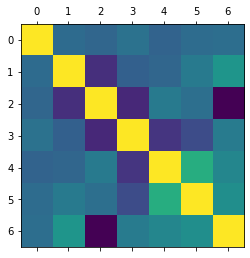

In [31]:
plt.matshow(train_data.corr())

 ### NaN 값 확인
 
 - info함수를 통해서 개수 확인
 - isna함수를 통해 boolean 타입으로 확인

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
train_data['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

### NaN 처리 방법

- 데이터에서 삭제
    - dropna 함수
- 다른 값으로 치환
    - fillna 함수

In [36]:
train_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [37]:
train_data.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
# column 삭제

train_data.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


### NaN 값 대체하기

- 평균으로 대체하기
- 생존자/사망자 별 평균으로 대체하기

In [40]:
train_data['Age'].fillna(train_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [45]:
# 생존자 나이 평균
mean1 = train_data[train_data['Survived'] == 1]['Age'].mean()

# 사망자 나이 평균
mean0 = train_data[train_data['Survived'] == 0]['Age'].mean()

mean0,mean1

(30.62617924528302, 28.343689655172415)

In [46]:
train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data[train_data['Survived'] == 0]['Age'].fillna(mean0)

0      22.000000
4      35.000000
5      30.626179
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    30.626179
890    32.000000
Name: Age, Length: 549, dtype: float64

In [47]:
train_data.loc[train_data['Survived'] == 1, 'Age'] = train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data.loc[train_data['Survived'] == 0, 'Age'] = train_data[train_data['Survived'] == 0]['Age'].fillna(mean0)

In [49]:
train_data[train_data['Age'] == 28.343689655172415]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.34369,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.34369,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.34369,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.34369,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,28.34369,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,28.34369,0,0,2677,7.2292,NaN,C
47,48,1,3,"O'Driscoll, Miss. Bridget",female,28.34369,0,0,14311,7.7500,NaN,Q
55,56,1,1,"Woolner, Mr. Hugh",male,28.34369,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,28.34369,1,1,2661,15.2458,NaN,C
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,28.34369,0,0,330932,7.7875,NaN,Q
